<a href="https://colab.research.google.com/github/namoshi/mathAI/blob/master/convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.nn import Conv2d
import matplotlib.pyplot as plt
import numpy as np

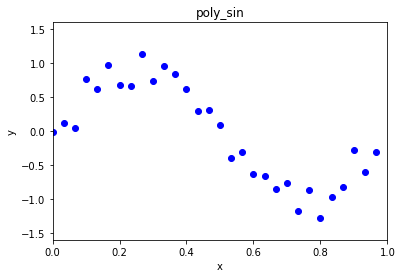

In [2]:
N = 30
x = np.arange(0, 1, 1.0/N)
y =  np.sin(2*np.pi*x) + np.random.normal(0,0.2,N)

plt.plot(x, y, 'bo') 
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('poly_sin.eps')
plt.show()
plt.close()

In [ ]:
# Define Convolutional Filter
m = torch.nn.Conv1d(1, 1, 3, stride=1, padding=1)
print(m.bias)
print(m.weight)
m.bias[0] = 0.0
m.weight[0][0][0] = 1.0/4.0
m.weight[0][0][1] = 2.0/4.0
m.weight[0][0][2] = 1.0/4.0
print(m.bias)
print(m.weight)

Parameter containing:
tensor([0.0278], requires_grad=True)
Parameter containing:
tensor([[[-0.1740, -0.0254,  0.5385]]], requires_grad=True)
Parameter containing:
tensor([0.], grad_fn=<CopySlices>)
Parameter containing:
tensor([[[0.2500, 0.5000, 0.2500]]], grad_fn=<CopySlices>)


In [ ]:
input = torch.from_numpy(y.reshape((1,1,N)).astype(np.float32)).clone()
output = m(input)
print(input)
print(output)
yest = output[0][0].to('cpu').detach().numpy().copy()
print(x.shape)
print(yest.shape)

tensor([[[-0.1344,  0.1473,  0.5550,  0.3280,  0.6713,  0.8282,  1.1206,
           0.9152,  1.3550,  0.9399,  0.5852,  1.0057,  0.7267,  0.7552,
           0.2052, -0.1909, -0.2845, -0.1076, -0.1647, -0.6354, -0.6293,
          -0.7022, -0.9211, -1.4045, -1.1294, -0.7317, -0.6053, -0.2864,
          -0.3919, -0.1092]]])
tensor([[[-0.0304,  0.1788,  0.3964,  0.4706,  0.6247,  0.8621,  0.9962,
           1.0765,  1.1413,  0.9550,  0.7790,  0.8308,  0.8036,  0.6106,
           0.2437, -0.1153, -0.2169, -0.1661, -0.2681, -0.5162, -0.6491,
          -0.7387, -0.9873, -1.2149, -1.0988, -0.7995, -0.5572, -0.3925,
          -0.2949, -0.1526]]], grad_fn=<SqueezeBackward1>)
(30,)
(30,)


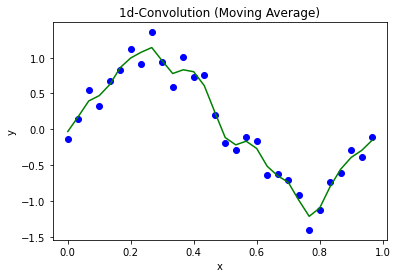

In [ ]:
plt.plot(x, y, 'bo') 
plt.plot(x, yest,'g-')
plt.title("1d-Convolution (Moving Average)")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('1d-conv.png')
plt.show()
plt.close()